# 1 D gaussian

$\epsilon \sim  \mathcal{N}{(\mu, \sigma^2)} = \frac{1}{\sqrt(2 \pi \sigma^2)} \exp(\frac{(x -\sigma)^2}{-2 \sigma ^2}) $

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mu, sigma = 0, 0.1 # mean and standard deviation

sample = np.random.normal(mu, sigma, 500)
print('mean and std of drawn sample is {}, {}'.format(np.mean(sample), np.std(sample)))

mean and std of drawn sample is -0.0024749165744355718, 0.09649205720648112


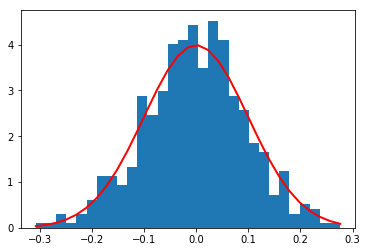

In [4]:
count, bins, ignored = plt.hist(sample, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')

# bivariate Gaussian distribution

$p(\boldsymbol{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)|\boldsymbol{\Sigma}|^{1/2}}} \exp\left( -\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^\mathrm{T}\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right),$

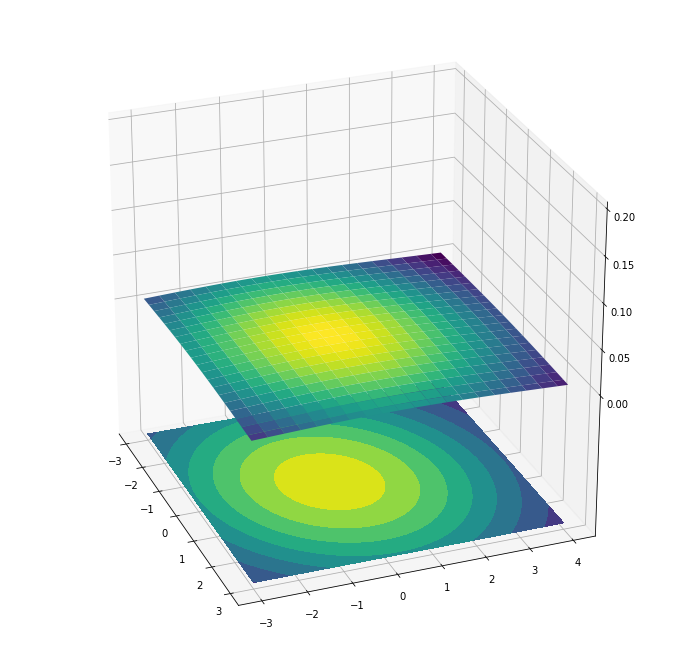

In [12]:
# original code at https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 10 , 1], [1,  10]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

# N-D gaussian

$p(\boldsymbol{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)|^{D/2}\boldsymbol{\Sigma}|^{1/2}}} \exp\left( -\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^\mathrm{T}\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right),$

where $ \boldsymbol{x}; \boldsymbol{\mu} \in \mathbb{R}^D$ and $\boldsymbol{\Sigma_{DxD}}$ matrix